In [1]:
from unidecode import unidecode
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


sns.set(rc={'figure.figsize': (10, 6)})

In [2]:
df, muta = [pd.read_csv(file_) for file_ in glob.glob(os.path.join('../data/raw/', '*'))]

### Missing Values

In [3]:
df.isna().mean() * 100

GISAID ID                     0.060680
Unnamed: 1                  100.000000
Virus name                    0.060680
FECHA DE COLECCIÓN            0.060680
FECHA DE SUBIDA A GISAID      0.060680
PROVINCIA                     0.060680
CIUDAD                        0.242718
TIPO                          0.910194
Genero                        0.060680
Edad                          0.060680
Linaje                        0.060680
Clado                         0.060680
Mutaciones                    0.060680
dtype: float64

In [4]:
muta.isna().mean() * 100

0I (Alpha, V1) (B.1.1.7)        78.181818
20H (Beta, V2) (B.1.351)        80.000000
20J (Gamma, V3) (P.1)           78.181818
21A (Delta) (B.1.617.2)         83.636364
21B (Kappa) (B.1.617.1)         89.090909
21K (Omicron) (BA.1)            34.545455
21L (Omicron) (BA.2)            43.636364
22A & 22B (Omicron) (BA.4&5)    38.181818
22C (Omicron) (BA.2.12.1)       40.000000
21D (Eta) (B.1.525)             83.636364
21F (Iota) (B.1.526)            89.090909
21G (Lambda) (C.37)             74.545455
21H (Mu) (B.1.621)              83.636364
dtype: float64

### Memory Usage

In [5]:
(df
 .memory_usage(deep=True)
 .pipe(lambda df_:pd.concat([df_, df.dtypes], axis=1))
 .rename(columns={0:'memory', 1:'dtype'})
)

,memory,dtype
Index,128,NaN
GISAID ID,119098,object
Unnamed: 1,13184,float64
Virus name,143752,object
FECHA DE COLECCIÓN,110114,object
FECHA DE SUBIDA A GISAID,110381,object
PROVINCIA,110907,object
CIUDAD,106642,object
TIPO,109197,object
Genero,102496,object


### The Data

In [6]:
df.sample(10).T

,451,873,615,1433,1427,538,603,1585,99,1373
GISAID ID,EPI_ISL_3089167,EPI_ISL_8183458,EPI_ISL_3506146,EPI_ISL_11515617,EPI_ISL_11515611,EPI_ISL_3260706,EPI_ISL_3505624,EPI_ISL_12692955,EPI_ISL_697796,EPI_ISL_11246369
Unnamed: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virus name,hCoV-19/Ecuador/USFQ-1667/2021,hCoV-19/Ecuador/USFQ-2334/2021,hCoV-19/Ecuador/USFQ-1781/2021,hCoV-19/Ecuador/USFQ-3167/2021,hCoV-19/Ecuador/USFQ-3157/2022,hCoV-19/Ecuador/USFQ-1856/2021,hCoV-19/Ecuador/USFQ-1935/2021,hCoV-19/Ecuador/USFQ-3357/2022,hCoV-19/Ecuador/USFQ-527/2020,hCoV-19/Ecuador/USFQ-3114/2022
FECHA DE COLECCIÓN,2021-07-10,2021-11-29,2021-07-19,2021-12-29,2022-01-14,2021-07-30,2021-07-21,2022-05-04,2020-05-26,2022-02-16
FECHA DE SUBIDA A GISAID,2021-07-26,2021-12-29,2021-08-19,2022-03-28,2022-03-28,2021-08-06,2021-08-19,2022-05-13,2020-12-13,2022-03-21
PROVINCIA,Chimborazo,Pichincha,Santo Domingo,Pichincha,Manabi,Los Rios,Manabi,Pichincha,Napo,Pichincha
CIUDAD,Riobamba,QUITO,Santo Domingo,QUITO,PORTOVIEJO,BABAHOYO,PORTOVIEJO,Quito,Tena,QUITO
TIPO,Hospital,Ambulatorio,Hospital,Ambulatorio,Hospital,Hospital,Hospital,Ambulatorio,Ambulatorio,Ambulatorio
Genero,Male,Female,Female,Female,Male,Male,Female,Female,unknown,Female
Edad,unknown,unknown,unknown,unknown,unknown,81,unknown,unknown,unknown,unknown


In [7]:
muta.head().T

,0,1,2,3,4
"0I (Alpha, V1) (B.1.1.7)",Principales mutaciones,S:D614G,NaN,S:P681H,S:N501Y
"20H (Beta, V2) (B.1.351)",NaN,S:D614G,S:E484K,NaN,S:N501Y
"20J (Gamma, V3) (P.1)",NaN,S:D614G,S:E484K,NaN,S:N501Y
21A (Delta) (B.1.617.2),NaN,S:D614G,NaN,S:P681R,NaN
21B (Kappa) (B.1.617.1),NaN,S:D614G,S:E484Q,S:P681R,NaN
21K (Omicron) (BA.1),NaN,S:D614G,S:E484A,S:P681H,S:N501Y
21L (Omicron) (BA.2),NaN,S:D614G,S:E484A,S:P681H,S:N501Y
22A & 22B (Omicron) (BA.4&5),NaN,S:D614G,S:E484A,S:P681H,S:N501Y
22C (Omicron) (BA.2.12.1),NaN,S:D614G,S:E484A,S:P681H,S:N501Y
21D (Eta) (B.1.525),NaN,S:D614G,S:E484K,NaN,NaN


#### __Conceptos Importantes__
##### <span style="color:#a11508;"> Linaje </span>
En microbiología, el término linaje se refiere a una rama evolutiva de una especie o un grupo de organismos que comparten una ascendencia común. Se puede pensar en un linaje como un árbol genealógico de una especie, donde las ramas representan diferentes cepas o subespecies que evolucionan a lo largo del tiempo. Los linajes pueden ser identificados por diferentes características, como la secuencia del ADN o la presencia o ausencia de ciertos genes o marcadores bioquímicos. La identificación y seguimiento de los linajes de los microorganismos son importantes en la investigación de enfermedades infecciosas y en la evaluación de la eficacia de los tratamientos y vacunas.

En resumen, un linaje es una rama evolutiva de una especie o grupo de organismos que comparten una ascendencia común.

##### <span style="color:#a11508;"> Clado </span>
En microbiología, un clado es un grupo de organismos que incluyen un ancestro común y todos sus descendientes. Se utiliza para clasificar a los organismos según su relación evolutiva y se representa en un árbol filogenético. Los miembros de un clado tienen características similares y comparten una serie de características derivadas que los distinguen de otros grupos.

En un árbol filogenético, los clados se representan por un nodo, que es el punto donde se bifurca el árbol y se separan los linajes evolutivos. Los clados se forman cuando un grupo de organismos diverge de un ancestro común y desarrollan nuevas características a lo largo del tiempo.

El uso de los clados es importante en la clasificación y nomenclatura de los microorganismos, ya que proporciona una forma sistemática de agrupar y describir a los organismos basados en su historia evolutiva.

En resumen, un clado es un grupo de organismos que incluyen un ancestro común y todos sus descendientes y se utiliza para clasificar a los organismos según su relación evolutiva.

##### <span style="color:#a11508;"> Mutaciones </span>
En microbiología, una mutación es un cambio en la secuencia del ADN que puede ocurrir naturalmente o ser provocado por agentes mutagénicos como la radiación o productos químicos. Las mutaciones pueden ser puntuales o afectar estructuras más complejas, y pueden ser beneficiosas, perjudiciales o neutras para el organismo. Su impacto depende del tipo de cambio que se produce en la secuencia del ADN y de la función de los genes afectados. Las mutaciones son importantes en la evolución de los microorganismos y pueden ser relevantes en la investigación y diagnóstico de enfermedades infecciosas, ya que pueden conferir resistencia a los antimicrobianos o alterar la virulencia del microorganismo.

En resumen, una mutación es un cambio en la secuencia del ADN que puede ser natural o provocado, puede ser beneficioso, perjudicial o neutro para el organismo, y puede ocurrir en diferentes etapas del ciclo de vida del microorganismo. Las mutaciones son importantes en la evolución y en el diagnóstico de enfermedades infecciosas.

### Columns and Index

In [8]:
(df
 .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
 .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
)

,virus_name,fecha_de_coleccion,provincia,ciudad,tipo,genero,edad,linaje,clado,mutaciones
0,hCoV-19/Ecuador/HEE-01/2020,2020-03-09,Pichincha,QUITO,Hospital,Male,57,B.55,L,Spike E1207V
1,hCoV-19/Ecuador/HGSQ-USFQ-018/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,27,B.1.1,GR,"(N_R203K,N_G204R,NSP12_P323L,NSP3_L431F,Spike_..."
2,hCoV-19/Ecuador/HGSQ-USFQ-007/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,40,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
3,hCoV-19/Ecuador/HGSQ-USFQ-010/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,39,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
4,hCoV-19/Ecuador/USFQ-020/2020,2020-04-17,Los Rios,BABAHOYO,Hospital,Female,50,B.1.67,G,"(NSP12_P323L,Spike_D614G)"
...,...,...,...,...,...,...,...,...,...,...
1643,hCoV-19/Ecuador/USFQ-3477/2022,2022-05-27,Pichincha,Quito,Ambulatorio,Male,42,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
1644,hCoV-19/Ecuador/USFQ-3479/2022,2022-05-28,Pichincha,Quito,Ambulatorio,Male,54,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I..."
1645,hCoV-19/Ecuador/USFQ-3482/2022,2022-05-29,Pichincha,Quito,Ambulatorio,Male,5,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
1646,hCoV-19/Ecuador/USFQ-3483/2022,2022-05-25,Pichincha,Quito,Ambulatorio,Male,34,BA.2,GRA,"(NSP5_P132H,Spike_S371F,NSP3_G489S,NSP13_R392C..."


### Datetimes

In [9]:
(df
 .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
 .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
 .assign(fecha_de_coleccion=lambda df_:pd.to_datetime(df_.fecha_de_coleccion))
 #.set_index('fecha_de_coleccion')
)

,virus_name,fecha_de_coleccion,provincia,ciudad,tipo,genero,edad,linaje,clado,mutaciones
0,hCoV-19/Ecuador/HEE-01/2020,2020-03-09,Pichincha,QUITO,Hospital,Male,57,B.55,L,Spike E1207V
1,hCoV-19/Ecuador/HGSQ-USFQ-018/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,27,B.1.1,GR,"(N_R203K,N_G204R,NSP12_P323L,NSP3_L431F,Spike_..."
2,hCoV-19/Ecuador/HGSQ-USFQ-007/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,40,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
3,hCoV-19/Ecuador/HGSQ-USFQ-010/2020,2020-03-30,Pichincha,QUITO,Hospital,Male,39,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
4,hCoV-19/Ecuador/USFQ-020/2020,2020-04-17,Los Rios,BABAHOYO,Hospital,Female,50,B.1.67,G,"(NSP12_P323L,Spike_D614G)"
...,...,...,...,...,...,...,...,...,...,...
1643,hCoV-19/Ecuador/USFQ-3477/2022,2022-05-27,Pichincha,Quito,Ambulatorio,Male,42,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
1644,hCoV-19/Ecuador/USFQ-3479/2022,2022-05-28,Pichincha,Quito,Ambulatorio,Male,54,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I..."
1645,hCoV-19/Ecuador/USFQ-3482/2022,2022-05-29,Pichincha,Quito,Ambulatorio,Male,5,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
1646,hCoV-19/Ecuador/USFQ-3483/2022,2022-05-25,Pichincha,Quito,Ambulatorio,Male,34,BA.2,GRA,"(NSP5_P132H,Spike_S371F,NSP3_G489S,NSP13_R392C..."


### Numerical Types

In [10]:
(df
 .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
 .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
 .drop(index=df[df.Edad.str.contains('months')==True].index)
 .assign(fecha_de_coleccion=lambda df_:pd.to_datetime(df_.fecha_de_coleccion),
         edad=lambda df_:(df_
                          .edad
                          .replace(to_replace=['unknown', 'M'], value=np.nan)), # neither floats nor int are nullable
        )
 .set_index('fecha_de_coleccion')
)

,virus_name,provincia,ciudad,tipo,genero,edad,linaje,clado,mutaciones
fecha_de_coleccion,,,,,,,,,
2020-03-09,hCoV-19/Ecuador/HEE-01/2020,Pichincha,QUITO,Hospital,Male,57,B.55,L,Spike E1207V
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-018/2020,Pichincha,QUITO,Hospital,Male,27,B.1.1,GR,"(N_R203K,N_G204R,NSP12_P323L,NSP3_L431F,Spike_..."
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-007/2020,Pichincha,QUITO,Hospital,Male,40,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
2020-03-30,hCoV-19/Ecuador/HGSQ-USFQ-010/2020,Pichincha,QUITO,Hospital,Male,39,B.1.14,O,"(NSP15_S293T,NS3_Q38P,NS3_V163T,NS3_R122E,NS3_..."
2020-04-17,hCoV-19/Ecuador/USFQ-020/2020,Los Rios,BABAHOYO,Hospital,Female,50,B.1.67,G,"(NSP12_P323L,Spike_D614G)"
...,...,...,...,...,...,...,...,...,...
2022-05-27,hCoV-19/Ecuador/USFQ-3477/2022,Pichincha,Quito,Ambulatorio,Male,42,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."
2022-05-28,hCoV-19/Ecuador/USFQ-3479/2022,Pichincha,Quito,Ambulatorio,Male,54,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,Spike_L24del,NSP4_T327I..."
2022-05-29,hCoV-19/Ecuador/USFQ-3482/2022,Pichincha,Quito,Ambulatorio,Male,5,BA.2,GRA,"(NSP5_P132H,NSP3_G489S,NSP4_T327I,Spike_S373P,..."


### Non-Numeric Types

In [11]:
df.columns

Index(['GISAID ID', 'Unnamed: 1', 'Virus name', 'FECHA DE COLECCIÓN',
       'FECHA DE SUBIDA A GISAID', 'PROVINCIA', 'CIUDAD', 'TIPO', 'Genero',
       'Edad', 'Linaje', 'Clado', 'Mutaciones'],
      dtype='object')

In [12]:
def get_mutaciones(df):

    dums = \
    (df
     .mutaciones
     .str.replace('[()]', '', regex=True)
     .str.get_dummies(sep=',')
     .rename(columns=lambda c: '__' + c)
    )
    
    return pd.concat([df, dums], axis=1)

df = \
(df
 .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
 .drop(index=df[df.Edad.str.contains('months')==True].index)
 .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
 .dropna(subset=['linaje', 'clado', 'mutaciones'])
 .applymap(lambda tx: unidecode(tx.title()) if isinstance(tx, str) else tx)
 .pipe(get_mutaciones)
 .assign(fecha_de_coleccion=lambda df_:pd.to_datetime(df_.fecha_de_coleccion),
         edad=lambda df_:(df_
                          .edad
                          .replace(to_replace=['Unknown', 'M'], value=np.nan)), # neither floats nor int are nullable
         virus_name_unidentified=lambda df_:(df_
                                             .virus_name
                                             .str.split('/', expand=True)[2]),
         count_muts=lambda df_:(df_
                                [[c for c in df_.columns if c not in ['provincia', 'ciudad', 'tipo', 
                                                                      'genero', 'edad', 'linaje', 
                                                                      'clado', 'virus_name', 'mutaciones',
                                                                      'fecha_de_coleccion', 'virus_name_unidentified']]]
                                .apply(lambda s: s.sum(), axis=1)),
        )
 .drop(columns=['virus_name', 'mutaciones'])
 .set_index('fecha_de_coleccion')
)

### Tweak Data

In [13]:
def get_mutaciones(df):

    dums = \
    (df
     .mutaciones
     .str.replace('[()]', '', regex=True)
     .str.get_dummies(sep=',')
     .rename(columns=lambda c: '__' + c)
    )
    
    return pd.concat([df, dums], axis=1)

def tweak_covid(df):
    return (df
     .rename(columns=lambda c:unidecode(c.replace(' ', '_').lower()))
     .drop(index=df[df.Edad.str.contains('months')==True].index)
     .drop(columns=['gisaid_id', 'unnamed:_1', 'fecha_de_subida_a_gisaid'])
     .dropna(subset=['linaje', 'clado', 'mutaciones'])
     .applymap(lambda tx: unidecode(tx.title()) if isinstance(tx, str) else tx)
     .pipe(get_mutaciones)
     .assign(fecha_de_coleccion=lambda df_:pd.to_datetime(df_.fecha_de_coleccion),
             edad=lambda df_:(df_
                              .edad
                              .replace(to_replace=['Unknown', 'M'], value=np.nan)), # neither floats nor int are nullable
             virus_name_unidentified=lambda df_:(df_
                                                 .virus_name
                                                 .str.split('/', expand=True)[2]),
             count_muts=lambda df_:(df_
                                    [[c for c in df_.columns if c not in ['provincia', 'ciudad', 'tipo', 
                                                                          'genero', 'edad', 'linaje', 
                                                                          'clado', 'virus_name', 'mutaciones',
                                                                          'fecha_de_coleccion', 'virus_name_unidentified']]]
                                    .apply(lambda s: s.sum(), axis=1)),
            )
     .drop(columns=['virus_name', 'mutaciones'])
     .set_index('fecha_de_coleccion')
    )

In [14]:
def check_memory(df):
    print(df.memory_usage(deep=True).sum() / 1000000)
    return df

def get_shape(df):
    print(df.shape)
    return df

## Arreglando los datos de ciudades y provincias

Provincia: Azuay
Ciudades: ['Cuenca']

Provincia: Bolivar
Ciudades: ['Guaranda']

Provincia: Canar
Ciudades: ['Azogues']

Provincia: Carchi
Ciudades: ['Reciento' 'Tulcan']

Provincia: Chimborazo
Ciudades: ['Riobamba']

Provincia: Cotopaxi
Ciudades: ['Latacunga']

Provincia: El Oro
Ciudades: ['Machala']

Provincia: Esmeraldas
Ciudades: ['Esmeraldas']

Provincia: Galapagos
Ciudades: ['San Cristobal' 'Santa Cruz']

Provincia: Guayas
Ciudades: ['Guayaquil - Tarqui' 'Guayaquil' 'General Villamil Playas' 'Duran'
 'Samborondon' 'La Puntilla' 'Machala' 'Via A La Costa' 'Entre Rios'
 'Terranova' 'El Condado' 'La Rioja' 'Portoviejo' 'Daule']

Provincia: Imbabura
Ciudades: ['Ibarra' 'Urcuqui' 'Otavalo' 'Gonzalez Saurez' 'San Rafael' 'San Luis'
 'Atuntaqui' 'San Antonio' 'Ibarra-Atuntaqui']

Provincia: Loja
Ciudades: ['Macara' 'Catamayo' 'Loja' 'Saraguro']

Provincia: Los Rios
Ciudades: ['Babahoyo' 'Quevedo']

Provincia: Manabi
Ciudades: ['Portoviejo' 'Calceta' 'Manta' 'Portoviejo -Pueblo Nuevo' n

<Axes: >

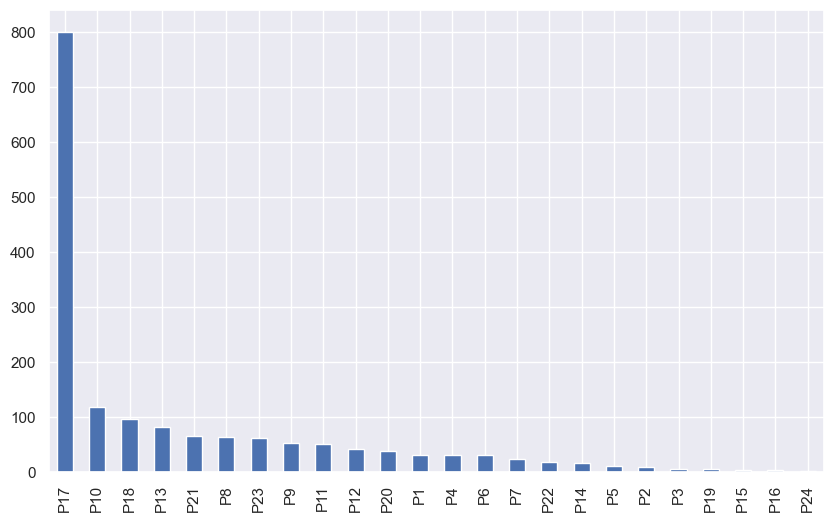

In [15]:

df['provincia'] = df['provincia'].str.strip()
df['provincia']=df['provincia'].str.replace('Pichincha', 'Pichincha')
correcciones_ciudades = {
    'Portoviejo': 'Manabi',
    'Nueva Loja': 'Sucumbios',
    'Zamora-Chinchipe': 'Zamora Chinchipe',
    # Agrega más correcciones según sea necesario
}

df['provincia'] = df['provincia'].replace(correcciones_ciudades)
df['ciudad'] = df['ciudad'].str.strip()

# Obtener las ciudades únicas por provincia
df['ciudad'] = df['ciudad'].str.strip()
ciudades_por_provincia = df.groupby('provincia')['ciudad'].unique()

# Mostrar las ciudades por provincia
for provincia, ciudades in ciudades_por_provincia.items():
    print(f'Provincia: {provincia}')
    print(f'Ciudades: {ciudades}')
    print()
ciudades_por_provincia = df[df['provincia'] == 'Pichincha']['ciudad'].value_counts()

# Mostrar el recuento de datos por ciudad en la provincia
print(ciudades_por_provincia)
# Si tiene PortoViejo en el nombre, entonces es Portoviejo y se debe corregir el nombre

import re

def corregir_nombre_ciudad(df,provincia_deseada,palabra_clave):
    """Corrige el nombre de la ciudad si tiene la palabra clave"""
    # Filtrar por la provincia deseada y la palabra clave
    ciudades_filtradas = df[(df['provincia'] == provincia_deseada) & (df['ciudad'].str.contains(palabra_clave))]
    # Realizar el reemplazo en la columna 'ciudad'
    df.loc[ciudades_filtradas.index, 'ciudad'] = df.loc[ciudades_filtradas.index, 'ciudad'].str.replace(f'^{palabra_clave}.+', palabra_clave, regex=True)
    print(df[df['provincia'] == provincia_deseada]['ciudad'].value_counts())
provincia_deseada = 'Pichincha'  # Especifica la provincia que deseas analizar
palabra_clave = 'Quito'  # Especifica la palabra clave para identificar las ciudades a modificar
corregir_nombre_ciudad(df,provincia_deseada, palabra_clave)
# Cargar el archivo provincias.tsv en un DataFrame

provincias_df = pd.read_csv('../data/diccionarios/provincias.tsv', delimiter='\t')

# Combinar los DataFrames utilizando la columna 'provincia' como clave de unión
df_con_codigos = df.merge(provincias_df, on='provincia', how='left')

# Cambiar el orden de las columnas
columnas = list(df.columns)
columnas.insert(columnas.index('provincia'), 'cod_provincia')
df_con_codigos = df_con_codigos[columnas]

# Eliminar la columna original 'provincia'
df_con_codigos.drop('provincia', axis=1, inplace=True)

# Mostrar el DataFrame con los valores de la columna 'provincia' cambiados por los códigos correspondientes
print(df_con_codigos)
#visualizar el recuento de datos por provincia en un bar plot
df_con_codigos['cod_provincia'].value_counts().plot(kind='bar')


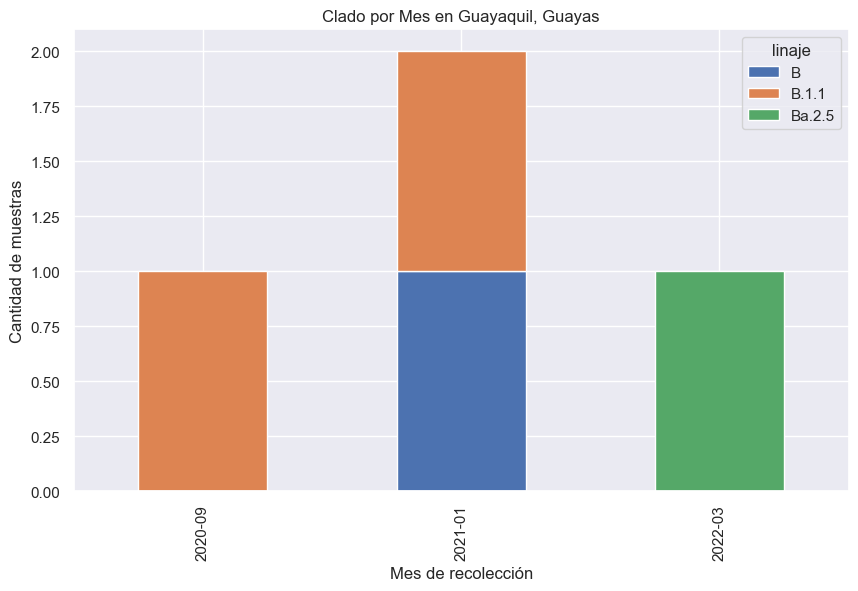

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df['anio_mes'] = df.index.to_period('M').strftime('%Y-%m')

# Filtrar el DataFrame solo para la ciudad de Guayaquil en la provincia de Guayas
df_Guayaquil = df[(df['provincia'] == 'Canar')]
 #                 & (df['ciudad'] == 'Guayaquil')]

# Realizar el agrupamiento y desagregar los valores por columna 'clado'
grouped = df_Guayaquil.groupby('anio_mes')['linaje'].value_counts().unstack()

# Crear la visualización
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Clado por Mes en Guayaquil, Guayas')
ax.set_xlabel('Mes de recolección')
ax.set_ylabel('Cantidad de muestras')

# Mostrar la visualización
plt.show()


In [17]:
df.columns

Index(['provincia', 'ciudad', 'tipo', 'genero', 'edad', 'linaje', 'clado',
       '__E_A41V', '__E_L73F', '__E_R61L',
       ...
       '__Spike_Y145N', '__Spike_Y145P', '__Spike_Y145T', '__Spike_Y248Del',
       '__Spike_Y248F', '__Spike_Y449N', '__Spike_Y505H',
       'virus_name_unidentified', 'count_muts', 'anio_mes'],
      dtype='object', length=2011)

In [18]:
#Coloración de los linajes por provincia
#utilizar un grafico en mapa de cada provincia y el linake mas representativo de cada una

In [19]:
#Guardar en un nuevo dataframe el linaje más representativo por mes por provincia con su respectiva cantidad de muestras
df_linajes = df.groupby(['provincia', 'anio_mes'])['linaje'].value_counts().to_frame('cantidad').reset_index()
df_linajes=df_linajes.rename(columns={0:'linaje'})
df_linajes['anio_mes'] = pd.to_datetime(df_linajes['anio_mes'], format='%Y-%m')
print(df_linajes['provincia'])

geocod_df = pd.read_csv('../data/diccionarios/geocod.csv', delimiter=',')
# Combinar los DataFrames utilizando la columna 'provincia' como clave de unión
df_con_latitudes = df_linajes.merge(geocod_df, on='provincia', how='left')


# Mostrar el DataFrame con los valores de la columna 'provincia' cambiados por los códigos correspondientes
print(df_con_latitudes.sample)


0                 Azuay
1                 Azuay
2                 Azuay
3                 Azuay
4                 Azuay
             ...       
612          Tungurahua
613          Tungurahua
614    Zamora Chinchipe
615    Zamora Chinchipe
616    Zamora Chinchipe
Name: provincia, Length: 617, dtype: object
<bound method NDFrame.sample of             provincia   anio_mes     linaje  cantidad   latitud   longitud
0               Azuay 2020-08-01        B.1         2 -2.894307 -78.996834
1               Azuay 2020-08-01    B.1.1.1         1 -2.894307 -78.996834
2               Azuay 2020-08-01    B.1.223         1 -2.894307 -78.996834
3               Azuay 2021-01-01          B         3 -2.894307 -78.996834
4               Azuay 2021-01-01    B.1.111         1 -2.894307 -78.996834
..                ...        ...        ...       ...       ...        ...
612        Tungurahua 2022-05-01  Ba.2.12.1         3 -1.263528 -78.566085
613        Tungurahua 2022-05-01    Ba.2.23         1 -1.263

In [20]:
df_con_latitudes.to_csv('../data/diccionarios/df_con_latitudes.csv', index=False)


In [21]:
import geopandas as gpd

In [22]:
import re

# Diccionario de linajes y variantes
linajes_variantes = {
    'B.1.1.7': 'Alpha',
    'B.1.351': 'Beta',
    'B.1.351.2': 'Beta',
    'B.1.351.3': 'Beta',
    
    'P.1': 'Gamma',
    'B.1.617.2': 'Delta',
    'B.1.617.3': 'Delta Plus',
    'B.1.1.529': 'Omicron',
}

# Función para asignar la variante basada en el linaje
def asignar_variante(linaje):
    for key, value in linajes_variantes.items():
        if re.match(r'Ba.*', linaje) and re.match(r'Ba.*', key):
            return 'Omicron'
        elif re.match(r'Ay.*', linaje) and re.match(r'Ay.*', key):
            return 'Delta'
        elif re.match(r'Q.*', linaje) and re.match(r'Q.*', key):
            return 'Alpha'
        elif re.match(r'P.*', linaje) and re.match(r'P.*', key):
            return 'Gamma'
        elif linaje == key:
            return value
    return None

# Aplicar la función a la columna "linaje" para crear la columna "variante"
df['variante'] = df['linaje'].apply(asignar_variante)

In [24]:
#Convertir el DataFrame en un GeoDataFrame
gdf = gpd.GeoDataFrame(df_con_latitudes, geometry=gpd.points_from_xy(df_con_latitudes.longitud, df_con_latitudes.latitud))


In [25]:
# Guardar el GeoDataFrame como un archivo GeoJSON
gdf.to_file('data.geojson', driver='GeoJSON')
from keplergl import KeplerGl
# Crear un mapa con Kepler.gl
map_1 = KeplerGl(height=500 )
map_1.add_data(data=gdf, name='points')

# Visualizar el mapa en el navegador web
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'points': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

## Todos

In [40]:
# @TODOS
# @ add column named concern = True if lineage/variant is of concern### Anomalies
# @ add column named count_muts = count of the number of mutations
# @ add column named avg_muts = average of the number per variant
# @